# Dipole Correction for Surface Calculations  
**by <span style="color:darkgreen">Qiang Fu</span> & <span style="color:darkgreen">Dmitrii Nabok</span> for [<span style="color:darkgoldenrod">exciting *neon*</span>](https://www.exciting-code.org/neon)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Mara Voiculescu</span> & <span style="color:darkgreen">Martin Kuban</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**: In this tutorial, you will learn how to set up and execute **`exciting`** calculations for dipole correction on the electrostatic potential of two-dimensional slabs containing a dipole moment in the vertical direction. An explicit example is the half-hydrogenated and half-fluorinated graphene monolayer (**HCCF**), in which the hydrogen atoms bond with carbon atoms on one side and fluorine atoms on the other side. It is also shown how to calculate and visualize the electrostatic potential, with and without the above dipole correction.
<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">

**Table of Contents**
    
[0. Before Starting](#0)
    
[1. Introduction](#1)  
    
[2. Running a Default Calculation without Applying Dipole Correction](#2)
   - Ground-state Calculation for Electrostatic Potential
   - Visualization of the Electrostatic Potential 

[3. Running a Calculation with Dipole Correction](#3)     

[Literature](#4)
</div>

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Before Starting</span>

**<span style="color:firebrick">Read the following paragraphs before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **`exciting`**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>

As a first step, you may create a running directory for the notebook.

In [1]:
%%bash
mkdir -p run_tutorial_dipole_correction

<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Introduction</span>

**DFT** calculations of surface systems can be performed in **`exciting`** by employing the "supercell approach", that is, embedding a slab of material in a periodic supercell. This approach is similar to the procedure used for calculating properties of molecules, as described in the tutorial **How to run calculations for simple molecules**.

Using the supercell approach to simulate asymmetric slab containing a net surface dipole density will cause an artificial electric field across the slab. The dipole correction scheme compensates for the artificial dipole field within the context of periodic supercell calculations by introducing an additional ramp-shaped potential that cancels that field. Assuming that the slab is set to be in the xy plane, the compensating potential is given by

$$V_{\rm dip}(z) = 4 \pi m \left( \frac{z}{z_m}-\frac{1}{2} \right),$$

where $m$ is a surface dipole moment and $z_m$ is the thickness of the box in the **z** direction. The correction introduces a jump in electrostatic potential which should, of course, be placed within the vacuum region of the supercell.

<a id='2'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. Running a Default Calculation without Applying Dipole Correction</span>
For the calculation to be performed without applying the dipole correction, create a working directory **DFT**.

In [2]:
%%bash
cd run_tutorial_dipole_correction
mkdir -p DFT
cd ..

#### <span style="color:#15317E">i) Ground-state Calculation for Electrostatic Potential</span>
Here is the input file (**input.xml**) for **HCCF** without applying the dipole correction. In other words, it is a standard **`exciting`** calculation.

<span class="HCCF_DFT"></span>
```xml
<input>
 
   <title>HCCF</title>
 
   <structure speciespath="$EXCITINGROOT/species" 
              cartesian="true" tshift="false">
      <crystal>
         <basevect>  4.92460000    0.00000000    0.00000000</basevect>
         <basevect>  2.46230000    4.26482870    0.00000000</basevect>
         <basevect>  0.00000000    0.00000000   28.00000000</basevect>
      </crystal>
      <species speciesfile="C.xml" rmt="1.25">
         <atom coord="  0.000000    0.000000   10.549058"/>
         <atom coord="  4.924600    2.843219   11.426802"/>
      </species>
      <species speciesfile="F.xml" rmt="1.20">
         <atom coord="  4.924600    2.843219   13.999961"/>
      </species>
      <species speciesfile="H.xml" rmt="0.80">
         <atom coord="  0.000000    0.000000    8.452276"/>
      </species>
   </structure>
 
   <groundstate 
      do="fromscratch"
      xctype="LDA_PW"
      ngridk="6 6 1"
      gmaxvr="14"
      rgkmax="3.5"
      outputlevel="normal">
   </groundstate>
 
   <properties>
      <exccplot>
         <plot3d>
            <box grid="24 24 125">
               <origin coord=" 0.0  0.0  0.0"/>
               <point  coord=" 1.0  0.0  0.0"/>
               <point  coord=" 0.0  1.0  0.0"/>
               <point  coord=" 0.0  0.0  1.0"/>
            </box>
         </plot3d>
      </exccplot>
   </properties>
 
</input>

```

In [3]:
from excitingjupyter.utilities import get_input_xml_from_notebook   

# Extract input file content from this notebook:
input_str = get_input_xml_from_notebook("08_tutorial_dipole_correction_for_surface_calculations", "HCCF_DFT")

# Write out the input as an XML file:
with open('./run_tutorial_dipole_correction/DFT/input.xml', "w") as fid:
    fid.write(input_str)

Make sure to set **$EXCITINGROOT** to the correct **`exciting`** root directory in the <code><span style="color:mediumblue">speciespath</span></code> attribute using the command

In [4]:
%%bash
cd run_tutorial_dipole_correction/DFT
python3 -m excitingscripts.setup.excitingroot
cd ../..

If the visualization program **XCrySDen** is set up appropriately (find here how to do this: [**XCrySDen Setup for exciting**](https://www.exciting-code.org/xcrysden-setup-for-exciting)), you can visualize the structure of **HCCF** in the **`exciting`** input file by executing

In [5]:
%%bash
cd run_tutorial_dipole_correction/DFT
xcrysden --exciting input.xml >/dev/null 2>&1 &
cd ../..

You will find the structure of the **HCCF** monolayer, like in the figure below. Here, all the fluorine atoms are located on one side, and the hydrogen atoms on the other side. Because of the electronegativity difference between F, H, and C atoms, there will be charge accumulation at the F side, and charge depletion at the H side. In other words, the monolayer has a dipole moment.

<figure>
<img src=" 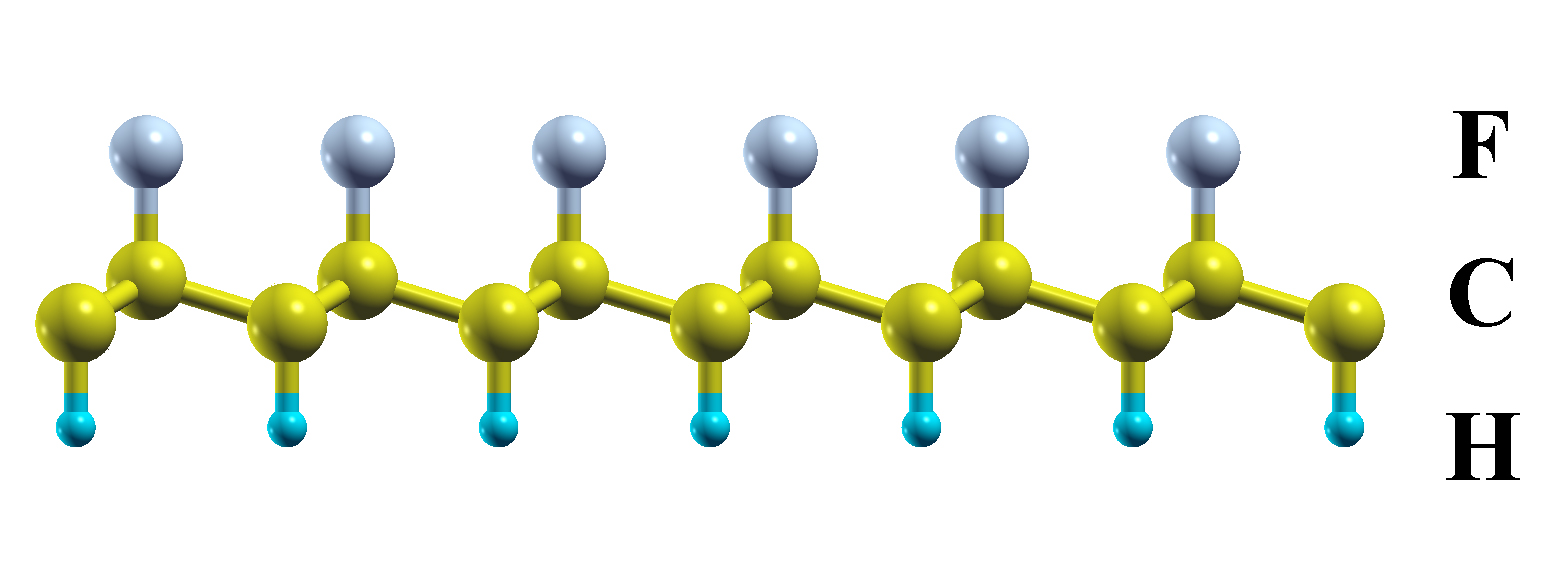" width="600" align="left"/>
</figure>

A detailed description on most of the attributes used here inside the element <code><span style="color:green">properties</span></code> can be found in the tutorial **How to Visualize Kohn-Sham States**. Here, the attribute <code><span style="color:mediumblue">exccplot</span></code> is a new one, from which the electrostatic potential and the exchange-correlation potential can be plotted in real space.

Then, start the ground-state calculation by executing the following command:

In [6]:
%%bash
cd run_tutorial_dipole_correction/DFT
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ../..

 ### Using specified input file: input.xml
 ### Using specified input file: input.xml
 
Info(potplot):
 3D Coulomb potential plot written to VCL3D.xml
 3D exchange-correlation potential plot written to VXC3D.xml
 


   Elapsed time = 1m56s


The electrostatic potential and the exchange-correlation potential are stored inside the files **VCL3D.xml** and **VXC3D.xml**, respectively.

#### <span style="color:#15317E">ii) Visualization of the Electrostatic Potential</span>
The file **VCL3D.xml** contains all information necessary for the visualization of the electrostatic potential. For the two-dimensional slab, it is always a good idea to visualize the plane-averaged electrostatic potential along the vertical (**z**) direction.

In [7]:
%%bash
cd run_tutorial_dipole_correction/DFT
python3 -m excitingscripts.execute.planar_average z
cd ../..

In order to visualize the results, just move back to the parent directory **dipole-correction** and execute the script **`excitingscripts.plot.files`** as follows

In [8]:
%%bash
cd run_tutorial_dipole_correction
python3 -m excitingscripts.plot.files -f planarAverage_z  -d DFT  -x 0 28  -y -0.4 0.3  -lx 'z [bohr]'  -ly '$V_{elec}$ [Ha]'  -t ""  -lp 4  -ll DFT
cd ..

The resulting plot of the electrostatic potential $V_{elec}(z)$ is contained in the file **PLOT.png** and will look like this:

<figure>
<img src=" " width="600" align="left"/>
</figure>

From this figure, you can see that the electrostatic potential within the vacuum layer is not flat, and the vacuum energy level cannot be identified. In principle, the true electrostatic potential of a two-dimensional slab, which contains a dipole moment in the vertical direction, will be flat within the vacuum layer but has a jump. However, owing to the periodic boundary condition applied in the "*supercell approach*", the electrostatic potential should be continuous at the boundary of the supercell, which makes the electrostatic potential at the right side decreases, and that at the left side increases, in order to maintain the continuity. By applying the dipole correction, the electrostatic potential will be flat, and the potential jump will be recovered, as presented in the next section.

<a id='3'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">3. Running a Calculation with Dipole Correction</span>
Inside the directory **dipole-correction**, create a new directory named **DFT-dc**. Then, copy the files **input.xml** and **STATE.OUT**, from where your last calculation was performed, to the current directory.

In [9]:
%%bash
cd run_tutorial_dipole_correction
mkdir -p DFT-dc && cd DFT-dc
cp ../DFT/input.xml ./
cp ../DFT/STATE.OUT ./
cd ..

The input file **input.xml** must be changed in order to perform the new calculation for **HCCF** including the dipole correction. In this case, three changes have to be made inside the <code><span style="color:green">groundstate</span></code> element, as shown in the following.
```xml
...
   <groundstate 
      do="fromfile"
      dipolecorrection="true"
      dipoleposition="0.9"
      ...>
   </groundstate>
...

```
1. Change the attribute <code><span style="color:blue">do</span>=<span style="color:firebrick">"fromscratch"</span></code> to <code><span style="color:blue">do</span>=<span style="color:firebrick">"fromfile"</span></code>. It means that you will use the pre-converged **STATE.OUT** file from the previous calculation. In some cases, this will improve the performance of self-consistent convergence after the corrected potential is added on the electrostatic potential.
2. Add the attribute <code><span style="color:blue">dipolecorrection</span>=<span style="color:firebrick">"true"</span></code>. Then, the functionality "dipole correction" is switched on.
3. Add the attribute <code><span style="color:blue">dipoleposition</span>=<span style="color:firebrick">"0.9"</span></code>. The value of the attribute <code><span style="color:blue">dipoleposition</span></code> indicates the position of the jump in electrostatic potential, after the compensating potential (i.e., the dipole correction) is applied. The value of <code><span style="color:firebrick">"0.9"</span></code> is a fractional coordinate in the vertical direction. **<span style="color:firebrick">Please note that</span>** this jump position should be located within the vacuum region enough far away from the atomic layers, otherwise the compensating potential cannot be correctly applied. It is recommended to put the jump position at the middle of the vacuum layer.

In [11]:
# The following lines modify the input.xml using Python

from excitingtools import ExcitingInputXML

parsed_input = ExcitingInputXML.from_xml('./run_tutorial_dipole_correction/DFT/input.xml')

parsed_input.groundstate.do = "fromfile"
parsed_input.groundstate.dipolecorrection = "true"
parsed_input.groundstate.dipoleposition = "0.9"

parsed_input.write('./run_tutorial_dipole_correction/DFT-dc/input.xml')

Then, start a new ground-state calculation by executing the command:

In [12]:
%%bash
cd run_tutorial_dipole_correction/DFT-dc
time $EXCITINGROOT/bin/exciting_smp input.xml
python3 -m excitingscripts.execute.planar_average z
cd ../..

 ### Using specified input file: input.xml
 ### Using specified input file: input.xml
 
Info(potplot):
 3D Coulomb potential plot written to VCL3D.xml
 3D exchange-correlation potential plot written to VXC3D.xml
 


   Elapsed time = 1m53s


To visualize the effect of the applied dipole correction, one can follow the same procedure described above

In [13]:
%%bash
cd run_tutorial_dipole_correction
python3 -m excitingscripts.plot.files -f planarAverage_z  -d DFT DFT-dc  -x 0 28  -y -0.4 0.3  -lx 'z [bohr]'  -ly '$V_{elec}$ [Ha]'  -t ""  -lp 4  -ll DFT
cd ..

The resulting electrostatic potentials with and without the dipole correction will look now like this:

<figure>
<img src=" 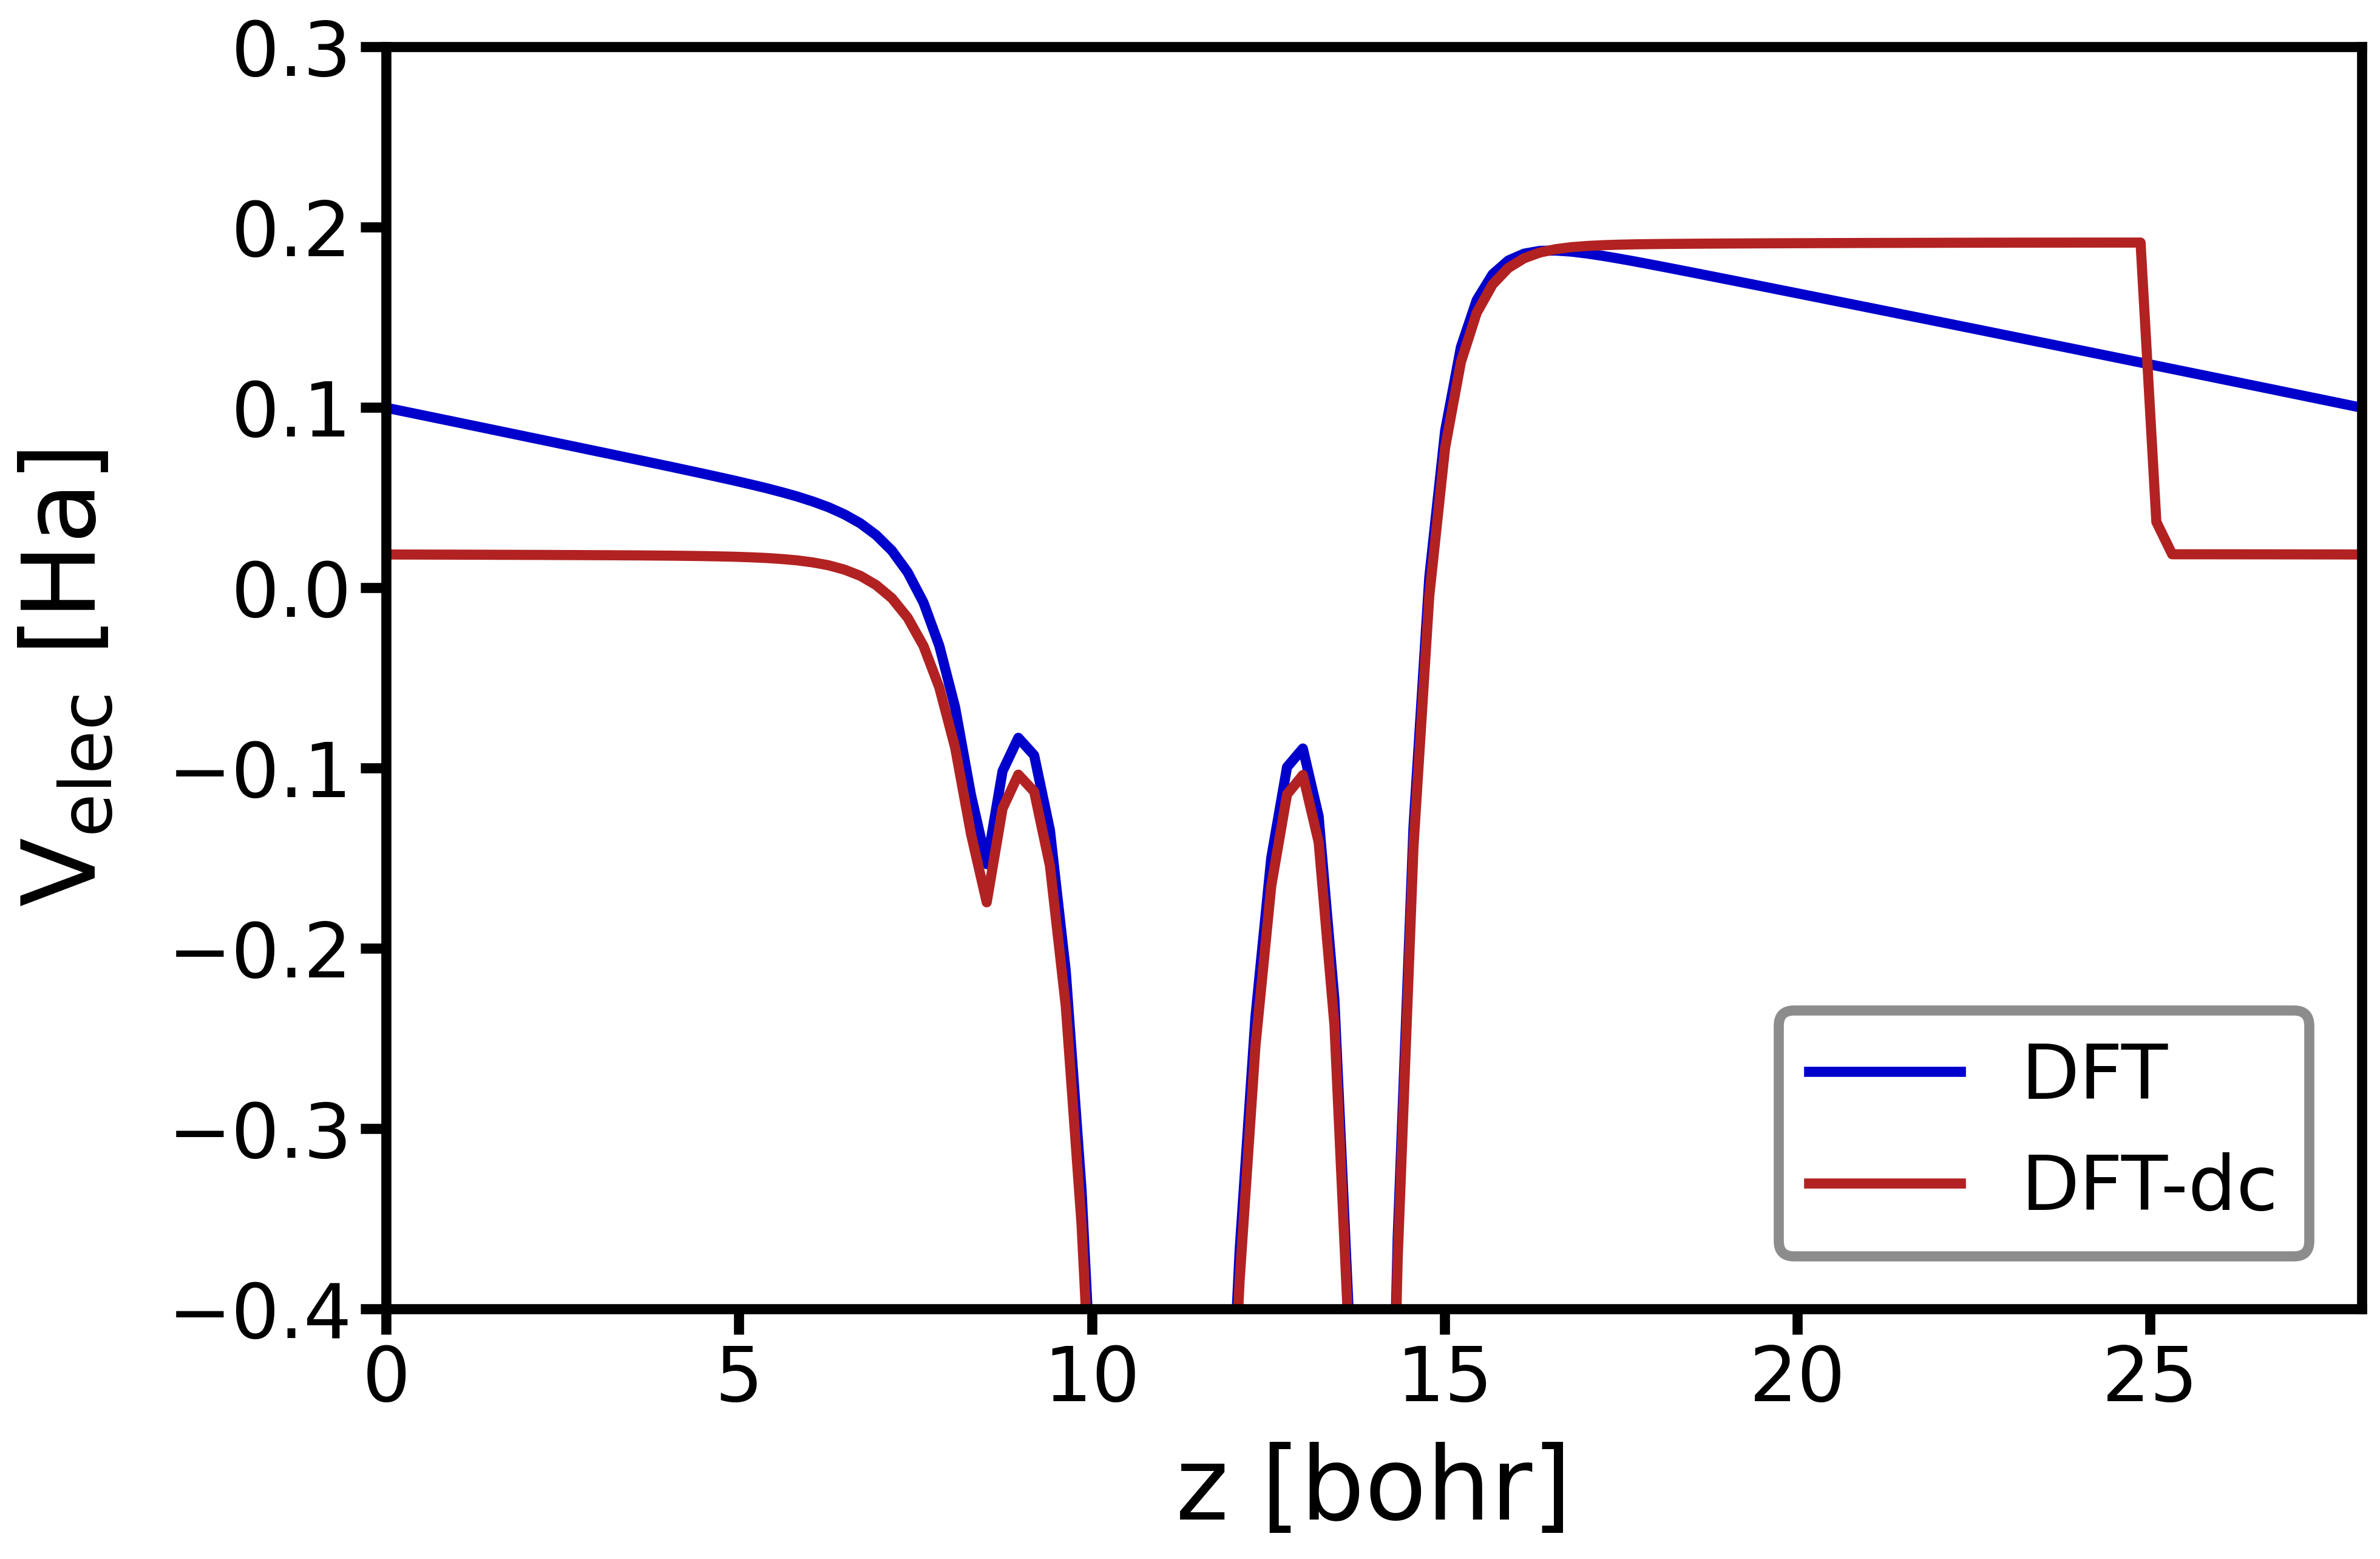" width="600" align="left"/>
</figure>

In this figure, you can see how the electrostatic potential has been corrected (blue line). It is flat on both sides and has a jump. The plateau in the vacuum layer refers to the vacuum energy level. By comparing its position with those of the corresponding valence band maximum (**VBM**) and conduction band minimum (**CBM**), you can calculate the ionization energy (**IE**) and electron affinity (**EA**), accordingly. Please note that here, due to the existence of a dipole, two platforms appear in the plane-averaged electrostatic potential. It means that the vacuum energy level is not the same at the two sides of **HCCF**, and, consequently, the **IE** and **EA** either.

<a id='4'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">Literature</span>

- Lennart Bengtsson, "*Dipole correction for surface supercell calculations*", Phys. Rev. B **59**, 12301 (1999).

<hr style="border:2px solid #DDD"> </hr>